#### Example of confidence limit calculation for linear regression fitting

Derived from linfit.py - https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/

References:
 - Statistics in Geography by David Ebdon (ISBN: 978-0631136880)
 - Reliability Engineering Resource Website:
 - http://www.weibull.com/DOEWeb/confidence_intervals_in_simple_linear_regression.htm
 - University of Glascow, Department of Statistics:
 - http://www.stats.gla.ac.uk/steps/glossary/confidence_intervals.html#conflim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# snow pillow (snow water equivalent) example data
data = pd.read_csv('pillows_example.csv')
x = np.array(data['BLC_max'])
y = np.array(data['SLI_max'])

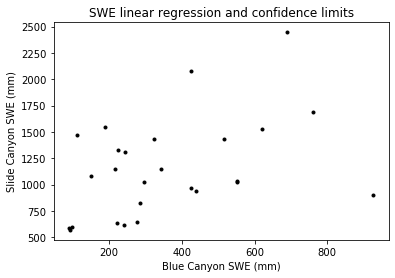

In [3]:
# set-up the plot
plt.xlabel('Blue Canyon SWE (mm)')
plt.ylabel('Slide Canyon SWE (mm)')
plt.title('SWE linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')

In [4]:
# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)

In [5]:
# get the coordinates for the fit curve
c_x = [np.min(x),np.max(x)]
c_y = p(c_x)

In [6]:
# predict y values of origional data using the fit
p_y = z[0] * x + z[1]

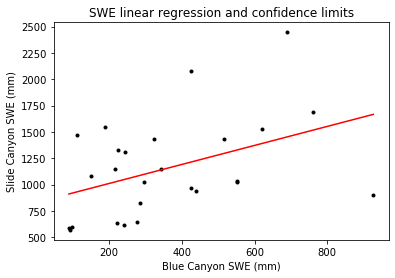

In [7]:
# plot the linear regression

# set-up the plot
plt.xlabel('Blue Canyon SWE (mm)')
plt.ylabel('Slide Canyon SWE (mm)')
plt.title('SWE linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')

In [8]:
p_y

array([1450.98467125,  930.14036761, 1024.18170021,  964.50162375,
        913.86398312, 1028.70291812, 1095.61694324, 1079.34055876,
       1085.67026383,  910.24700879, 1389.49610763, 1045.8835462 ,
       1213.168609  , 1048.59627694, 1000.67136706, 1295.45477502,
       1033.22413604, 1214.07285258, 1139.02063521, 1327.10330042,
       1122.74425073, 1516.99445279,  918.38520103, 1666.19464394,
       1225.82801915, 1328.91178758])

In [9]:
# calculate the y-error (residuals)
y_err = y - p_y

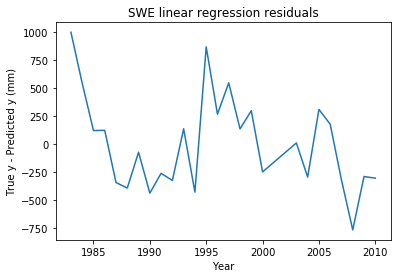

In [10]:
# plot the residuals

# set-up the plot
plt.xlabel('Year')
plt.ylabel('True y - Predicted y (mm)')
plt.title('SWE linear regression residuals')

plt.plot(data['years'],y_err)

In [11]:
# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)

In [12]:
# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)                 # mean of x
n = x.size                          # number of samples in origional fit
t = st.t.ppf(0.0975, n)             # appropriate t value (for n, and two tailed 95%)        
sse = np.sum(y_err**2)              # sum of the squares of the residuals
st_err = np.sqrt(sse/(n-2))         # standard error

sigma = st_err**2 * (1 + 1/n + ( ( n*(p_x-mean_x)**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) )
confs = t * np.sqrt(sigma)

In [13]:
# now predict y based on test x-values
p_y = z[0]*p_x+z[1]

In [14]:
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

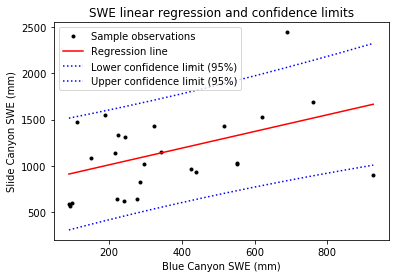

In [15]:
# set-up the plot
plt.xlabel('Blue Canyon SWE (mm)')
plt.ylabel('Slide Canyon SWE (mm)')
plt.title('SWE linear regression and confidence limits')
 
# plot sample data
plt.plot(x,y,'.k',label='Sample observations')
 
# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')
 
# plot confidence limits
plt.plot(p_x,lower,':b',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,':b',label='Upper confidence limit (95%)')
 
# configure legend
plt.legend(loc='upper left')
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10);